The Branch-Bound Algorithm:

In [80]:
import networkx as nx
import matplotlib.pyplot as plt
import time
start_time = time.time()

In [81]:
# Functions to figure out the complete graphs
def complete_graph(G):
    is_complete = nx,is_complete_graph(G)
    return is_complete

In [82]:
#Functions to figure out the holes
def hole_graph(G):
    cycle = nx.find_cycle(G)
    if len(cycle) == len(G.nodes()):
        return True
    else:
        return False

In [83]:
def remove_clique(G, clique_nodes):
    new_graph = G.copy()
    edges_to_remove = [(u, v) for u, v in new_graph.edges() if u in clique_nodes and v in clique_nodes]
    new_graph.remove_edges_from(edges_to_remove)
    isolated_nodes = [node for node in clique_nodes if len(new_graph[node]) == 0]
    new_graph.remove_nodes_from(isolated_nodes)
    return new_graph

In [84]:
def graph_connected(G):
    return nx.is_connected(G)

In [85]:
def clique_cutset(G):
    all_cliques = list(nx.find_cliques(G))
    clique_cutset_max = 0
    sub_graph = G.copy()
    for clique_nodes in all_cliques:
        temp_graph = remove_clique(G, clique_nodes)
        if graph_connected(temp_graph)is False:
            sub_graph = remove_clique(sub_graph, clique_nodes)
            if len(clique_nodes) > clique_cutset_max:
                clique_cutset_max = len(clique_nodes)
    if clique_cutset_max == 0:
        return False, None, None
    else:
        return True, sub_graph, clique_cutset_max

In [86]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3),(1,4),(2,4),(2, 3), (3, 4), (4, 8),(3,5),(5,6),(5,7),(6,7),(8,9),(8,10),(8,11),(8,12),(9,10),(9,11),(9,12),(10,11),(10,12),(11,12)])
temp_situ,temp_graph,max_clique = clique_cutset(G)

In [87]:
def greedy_coloring(G):
    colors = {}
    for node in G.nodes():
        neighbor_colors = {colors[neighbor] for neighbor in G.neighbors(node) if neighbor in colors}
        color = 1
        while color in neighbor_colors:
            color += 1
        colors[node] = color
    color_count = set(colors)
    return colors, len(color_count)

In [88]:
start_two = time.time()
max_color = max_clique
connected_parts = list(nx.connected_components(temp_graph))
sub_graphs = [temp_graph.subgraph(i) for i in connected_parts]
for subgraph in sub_graphs:
    sub_colors, sub_color = greedy_coloring(subgraph)
    if sub_color > max_color:
        max_color = sub_color
print(max_color)
end_time = time.time()
running_time = (end_time - start_time) * 1000
print("Running time", running_time, "ms")

5
Running time 121.9644546508789 ms


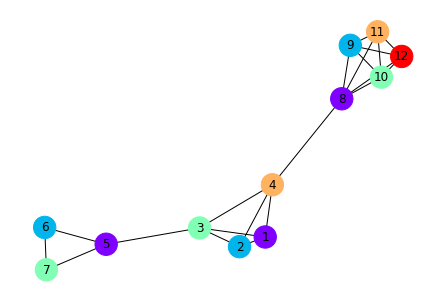

In [55]:
coloring_result, color_count = greedy_coloring(G)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=[coloring_result[node] for node in G.nodes()], cmap=plt.cm.rainbow, node_size=500)
plt.show()

The Pending Graph:

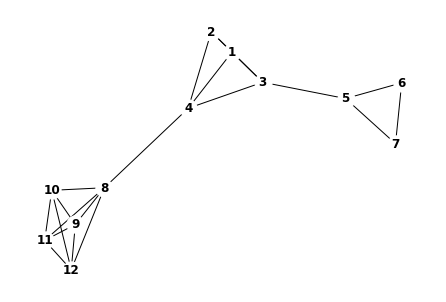

In [56]:
nx.draw(G, with_labels=True, font_weight='bold', node_color='white')

The Greedy Algorithm:

5
Running time 0.9000301361083984 ms


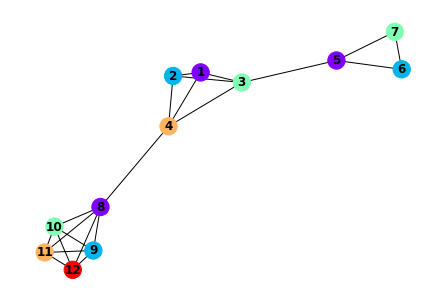

In [61]:
import networkx as nx
import matplotlib.pyplot as plt
import time

start_greedy = time.time()
def greedy_coloring(graph):
    color_map = {} 
    available_colors = set(range(1, len(graph) + 1)) 

    for node in graph.nodes():
        neighbor_colors = {color_map[n] for n in graph.neighbors(node) if n in color_map}
        node_color = min(available_colors - neighbor_colors)
        color_map[node] = node_color

    return color_map, len(set(color_map.values()))

G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3),(1,4),(2,4),(2, 3), (3, 4), (4, 8),(3,5),(5,6),(5,7),(6,7),(8,9),(8,10),(8,11),(8,12),(9,10),(9,11),(9,12),(10,11),(10,12),(11,12)])


coloring, min_color = greedy_coloring(G)
print(min_color)
end_greedy = time.time()
running_greedy = (end_greedy - start_greedy) * 1000
print("Running time", running_greedy, "ms")


node_colors = [coloring[node] for node in G.nodes()]
nx.draw(G, with_labels=True, font_weight='bold', node_color=node_colors, cmap=plt.cm.rainbow)

plt.show()


The Backtracking Algorithm:

In [89]:
import networkx as nx
import time

start_backtracking = time.time()

def is_safe(node, color, coloring, graph):
    for neighbor in graph.neighbors(node):
        if neighbor in coloring and coloring[neighbor] == color:
            return False
    return True

def backtrack_coloring(node, num_colors, coloring, graph):
    if node not in coloring:
        for color in range(1, num_colors + 1):
            if is_safe(node, color, coloring, graph):
                coloring[node] = color
                next_node = next_uncolored_node(coloring, graph)
                if next_node is None:
                    return True
                if backtrack_coloring(next_node, num_colors, coloring, graph):
                    return True
                coloring.pop(node)
        return False
    else:
        next_node = next_uncolored_node(coloring, graph)
        if next_node is None:
            return True
        return backtrack_coloring(next_node, num_colors, coloring, graph)

def next_uncolored_node(coloring, graph):
    for node in graph.nodes():
        if node not in coloring:
            return node
    return None

G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3),(1,4),(2,4),(2, 3), (3, 4), (4, 8),(3,5),(5,6),(5,7),(6,7),(8,9),(8,10),(8,11),(8,12),(9,10),(9,11),(9,12),(10,11),(10,12),(11,12)])

num_colors = len(G)
coloring = {}

backtrack_coloring(1, num_colors, coloring, G)

min_colors = max(coloring.values())

print("Minimum num of colours:", min_colors)
end_backtracking = time.time()
running_backtracking = (end_backtracking - start_backtracking) * 1000
print("Running time", running_backtracking, "ms")


Minimum num of colours: 5
Running time 3.0121803283691406 ms
